In [79]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df2=pd.read_csv('Book2.csv')

In [81]:
df2.head()

,PE,6M return,1Y return,2Y return,3Y return,5Y return,Predict,Month
0,19.96,132.9%,73.7%,29.7%,9.7%,13.4%,13.7%,4-Jan
1,19.74,76.1%,69.3%,25.6%,10.0%,12.9%,16.8%,4-Feb
2,20.70,56.3%,81.1%,25.2%,15.6%,10.4%,14.9%,4-Mar
3,18.68,33.3%,92.3%,28.7%,16.9%,12.9%,5.9%,4-Apr
4,11.94,-15.6%,47.4%,20.1%,8.3%,5.6%,40.7%,4-May


In [82]:
df2['6M return'] = df2['6M return'].astype(str).str.replace('%', '').astype(float)
df2['1Y return'] = df2['1Y return'].astype(str).str.replace('%', '').astype(float)
df2['2Y return'] = df2['2Y return'].astype(str).str.replace('%', '').astype(float)
df2['3Y return'] = df2['3Y return'].astype(str).str.replace('%', '').astype(float)
df2['5Y return'] = df2['5Y return'].astype(str).str.replace('%', '').astype(float)
df2['Predict']=df2['Predict'].astype(str).str.replace('%', '').astype(float)
df2.tail()

,PE,6M return,1Y return,2Y return,3Y return,5Y return,Predict,Month
235,23.45,32.9,26.7,20.1,16.3,17.9,NaN,Aug-24
236,23.51,28.1,30.1,20.0,14.0,18.5,NaN,Sep-24
237,24.25,31.9,32.1,23.6,13.7,17.8,NaN,Oct-24
238,22.68,15.2,28.0,15.7,10.7,15.4,NaN,Nov-24
239,22.35,8.9,19.8,13.6,12.2,15.0,NaN,Dec-24


In [83]:
df2.isnull().sum()

PE            0
6M return     0
1Y return     0
2Y return     0
3Y return     0
5Y return     0
Predict      12
Month         0
dtype: int64

In [84]:
data2024=df2.iloc[-12:]
data2024
df2.drop(index=df2.index[-12:],inplace=True)



In [85]:
df2.tail()


,PE,6M return,1Y return,2Y return,3Y return,5Y return,Predict,Month
223,22.96,25.5,13.8,11.5,21.9,11.1,26.7,Aug-23
224,22.17,24.0,10.8,6.7,19.2,12.2,30.1,Sep-23
225,22.09,26.0,15.6,5.5,19.6,13.5,32.1,Oct-23
226,20.40,9.5,4.6,2.9,17.6,11.8,28.0,Nov-23
227,21.66,20.2,7.7,8.7,15.6,13.3,19.8,Dec-23


In [86]:
month=df2['Month']
month_index=df2.index
print(type(month))
print(month)

<class 'pandas.core.series.Series'>
0       4-Jan
1       4-Feb
2       4-Mar
3       4-Apr
4       4-May
        ...  
223    Aug-23
224    Sep-23
225    Oct-23
226    Nov-23
227    Dec-23
Name: Month, Length: 228, dtype: object


In [87]:
df2.drop(columns='Month',inplace=True)

In [88]:
df2.head(20)

,PE,6M return,1Y return,2Y return,3Y return,5Y return,Predict
0,19.96,132.9,73.7,29.7,9.7,13.4,13.7
1,19.74,76.1,69.3,25.6,10.0,12.9,16.8
2,20.70,56.3,81.1,25.2,15.6,10.4,14.9
3,18.68,33.3,92.3,28.7,16.9,12.9,5.9
4,11.94,-15.6,47.4,20.1,8.3,5.6,40.7
5,12.64,-35.8,32.8,19.3,10.8,4.9,47.5
6,13.63,-18.6,37.6,30.5,15.0,4.5,41.7
7,13.64,-17.8,20.3,27.1,15.7,2.9,46.1
8,14.59,-3.0,23.2,34.6,24.1,4.3,49.0
9,14.93,-1.0,14.8,37.0,22.5,6.2,32.7


In [89]:
def categorize(value):
    if value <= -15:
        return 1
    elif -15 < value <= -5:
        return 2
    elif -5 < value <= 5:
        return 3
    elif  5<value<=15:
        return 4
    else:
        return 5
    # else:  # value > 15
    #     return 5
    
df2['Category'] = df2['Predict'].apply(categorize)




# def categorize(value):
#     if value <= -15:
#         return 1
#     elif -15 < value <= 5:
#         return 2
#     elif 5 < value <= 15:
#         return 3
#     elif  value>15:
#         return 4
#     # else:  # value > 15
#     #     return 5
    
# df2['Category'] = df2['Predict'].apply(categorize)


# Also try in code with normal 5 classes just remove 3 class in training -best model


In [90]:
df2.head(50)
class_counts = np.bincount(df2['Category'])
print(class_counts)

[  0  15  14  37  62 100]


<Axes: >

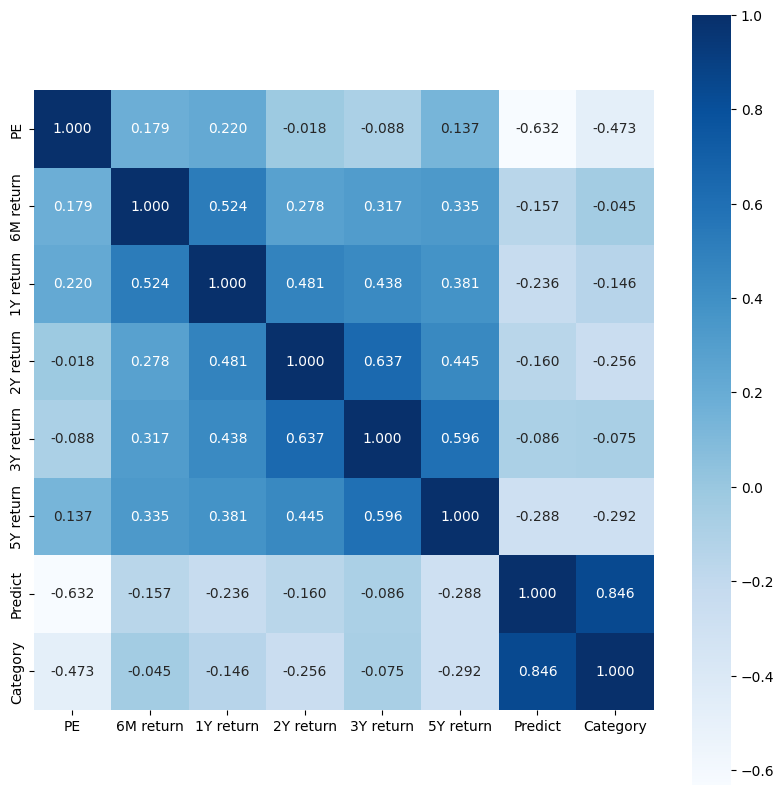

In [91]:
correlation=df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.3f', annot=True, annot_kws={'size':10}, cmap='Blues')

Train_test_split


In [92]:
data=df2.copy()
predict=data['Predict']
df2.head()
df2.drop(columns='Predict',inplace=True)


In [93]:
df2.head()
# df2.drop(columns='PE',inplace=True)

,PE,6M return,1Y return,2Y return,3Y return,5Y return,Category
0,19.96,132.9,73.7,29.7,9.7,13.4,4
1,19.74,76.1,69.3,25.6,10.0,12.9,5
2,20.70,56.3,81.1,25.2,15.6,10.4,4
3,18.68,33.3,92.3,28.7,16.9,12.9,4
4,11.94,-15.6,47.4,20.1,8.3,5.6,5


In [94]:
# print(df2)
print(df2.isnull().sum())

PE           0
6M return    0
1Y return    0
2Y return    0
3Y return    0
5Y return    0
Category     0
dtype: int64


In [95]:
df2

,PE,6M return,1Y return,2Y return,3Y return,5Y return,Category
0,19.96,132.9,73.7,29.7,9.7,13.4,4
1,19.74,76.1,69.3,25.6,10.0,12.9,5
2,20.70,56.3,81.1,25.2,15.6,10.4,4
3,18.68,33.3,92.3,28.7,16.9,12.9,4
4,11.94,-15.6,47.4,20.1,8.3,5.6,5
...,...,...,...,...,...,...,...
223,22.96,25.5,13.8,11.5,21.9,11.1,5
224,22.17,24.0,10.8,6.7,19.2,12.2,5
225,22.09,26.0,15.6,5.5,19.6,13.5,5
226,20.40,9.5,4.6,2.9,17.6,11.8,5


In [96]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.utils import resample

# y = df2['Category']
# df2.drop(columns='Category', inplace=True)
# X = df2

# data = pd.concat([X, y], axis=1)

# class_1 = data[data['Category'] == 1]
# class_2 = data[data['Category'] == 2]
# class_3=data[data['Category']==3]
# other_classes = data[~data['Category'].isin([1, 2])]

# print(len(other_classes)//7)
# class_1_oversampled = resample(class_1, replace=True, n_samples=len(other_classes)//7, random_state=42)
# class_2_oversampled = resample(class_2, replace=True, n_samples=len(other_classes)//7, random_state=42)
# class_3_oversampled = resample(class_3, replace=True, n_samples=len(other_classes)//11, random_state=42)

# balanced_data = pd.concat([class_1_oversampled, class_2_oversampled, other_classes,class_3])

# X_balanced = balanced_data.drop(columns=['Category'])
# y_balanced = balanced_data['Category']

# X_train, X_test, y_train, y_test = train_test_split(
#     X_balanced, y_balanced, test_size=0.25, random_state=42, stratify=y_balanced
# )

# param_grid = {
#     'n_estimators': [150, 200, 300],
#     'max_depth': [5, 7],
#     'min_samples_split': [5, 10, 20],
#     'min_samples_leaf': [4, 6]
# }

# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=3,
#     scoring='accuracy',
#     verbose=1,
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# y_test_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# results_df = pd.DataFrame({
#     'Actual Class': y_test.values,
#     'Predicted Class': y_test_pred
# }).reset_index(drop=True)
# print(results_df.head(20))
# results_df.to_excel('Prediction.xlsx')

# print("Best Parameters:", grid_search.best_params_)
# print("Test Accuracy:", test_accuracy)
# print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from scipy.stats import zscore

# Assuming df2 is already defined
y = df2['Category']
X = df2.drop(columns='Category')

# Handling class imbalance
data = pd.concat([X, y], axis=1)
class_1 = data[data['Category'] == 1]
class_2 = data[data['Category'] == 2]


# Filter Class 3 data
class_3 = data[data['Category'] == 3]
z_scores = class_3.drop(columns=['Category']).apply(zscore)
threshold = 3
outliers = (z_scores.abs() > threshold).any(axis=1)
class_3_cleaned = class_3[~outliers]
print("Number 3",class_3_cleaned.shape[0])
other_classes = data[~data['Category'].isin([1, 2,3])]

# Filter Class 4 data
class_4 = data[data['Category'] == 4]
z_scores = class_4.drop(columns=['Category']).apply(zscore)
threshold = 3
outliers = (z_scores.abs() > threshold).any(axis=1)
class_4_cleaned = class_4[~outliers]
print("Number 4",class_4_cleaned.shape[0])

# Filter Class 5 data
class_5 = data[data['Category'] == 5]
z_scores = class_5.drop(columns=['Category']).apply(zscore)
threshold = 3
outliers = (z_scores.abs() > threshold).any(axis=1)
class_5_cleaned = class_5[~outliers]
print("Number 5",class_5_cleaned.shape[0])

# Dynamic oversampling to balance classes
class_1_oversampled = resample(class_1, replace=True, n_samples=len(other_classes)//7, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=len(other_classes)//7, random_state=42)
# class_3_oversampled = resample(class_3, replace=True, n_samples=len(other_classes)//11, random_state=42)

balanced_data = pd.concat([class_1_oversampled, class_2_oversampled,class_3_cleaned,class_4_cleaned,class_5_cleaned])

# Splitting into features and target
X_balanced = balanced_data.drop(columns=['Category'])
y_balanced = balanced_data['Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.25, random_state=42, stratify=y_balanced
)

# Updated hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [4, 6, 10],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model and predictions
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)

# Confidence calculation: max probability per prediction
confidence_scores = y_test_prob.max(axis=1)
average_confidence = confidence_scores.mean()

# Output results
results_df = pd.DataFrame({
    'Actual Class': y_test.values,
    'Predicted Class': y_test_pred,
    'Confidence': confidence_scores
}).reset_index(drop=True)

# Save predictions with confidence to Excel
results_df.to_excel('Prediction_with_Confidence.xlsx', index=False)

# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Average Confidence Level:", average_confidence)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Optional: Display the top predictions with highest and lowest confidence
print("Top 10 Highest Confidence Predictions:\n", results_df.sort_values(by='Confidence', ascending=False))


Number 3 35
Number 4 58
Number 5 95
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.6440677966101694
Average Confidence Level: 0.6115759453233142
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       0.75      0.50      0.60         6
           3       0.80      0.44      0.57         9
           4       0.43      0.43      0.43        14
           5       0.67      0.83      0.74        24

    accuracy                           0.64        59
   macro avg       0.70      0.61      0.63        59
weighted avg       0.66      0.64      0.64        59

Top 10 Highest Confidence Predictions:
     Actual Class  Predicted Class  Confidence
23             5                5    0.982173
41             5                5 

In [98]:

absolute_difference = abs(y_test.values - y_test_pred)


normalized_difference = absolute_difference.sum() / len(y_test)
print(f"Normalized Average Absolute Difference: {normalized_difference:.4f}")


Normalized Average Absolute Difference: 0.4407


In [99]:
y_test_proba = best_model.predict_proba(X_test)
confidence_levels = y_test_proba.max(axis=1)  
results_with_confidence = pd.DataFrame({
    'Actual Class': y_test.values,
    'Predicted Class': y_test_pred,
    'Confidence Level': confidence_levels
}).reset_index(drop=True)

print(results_with_confidence)


# results_with_confidence.to_excel('classification_results_with_confidence.xlsx', index=False)
print("Results with confidence levels saved to 'classification_results_with_confidence.xlsx'")


    Actual Class  Predicted Class  Confidence Level
0              4                4          0.370974
1              5                5          0.887760
2              2                1          0.805118
3              3                3          0.385836
4              5                4          0.452284
5              4                5          0.640744
6              3                5          0.495800
7              5                5          0.482298
8              5                5          0.562537
9              4                4          0.462302
10             2                2          0.588552
11             4                4          0.436467
12             1                1          0.851271
13             3                4          0.389820
14             4                5          0.644017
15             5                5          0.737704
16             5                5          0.704068
17             2                2          0.432096
18          

In [100]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_test_pred, average='weighted')
print(f"Precision: {precision:.2f}")


Precision: 0.66


In [101]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_test_pred, average='weighted')
print(f"Recall: {recall:.2f}")


Recall: 0.64


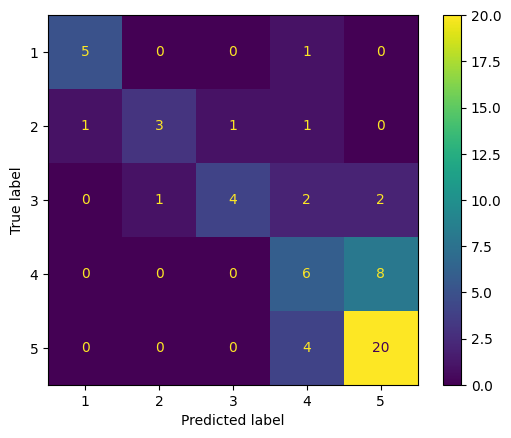

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()


In [103]:
y_train_pred = best_model.predict(X_train)

total_correct_train = sum(y_train.values == y_train_pred)
total_misclassified_train = len(y_train) - total_correct_train
accuracy_train = total_correct_train / len(y_train)

print(f"Total Correct Classifications (Train): {total_correct_train}")
print(f"Total Misclassifications (Train): {total_misclassified_train}")
print(f"Accuracy (Train): {accuracy_train}")


Total Correct Classifications (Train): 139
Total Misclassifications (Train): 36
Accuracy (Train): 0.7942857142857143


In [104]:
print(len(df2))
print(len(y))

228
228


In [105]:
# Separate the rows in the original test set that were not oversampled
original_test_data = other_classes.sample(n=50, random_state=42)  # Take 50 samples from original data
X_original_test = original_test_data.drop(columns=['Category'])
y_original_test = original_test_data['Category']

# Predict on the original (non-oversampled) test data
y_original_pred = best_model.predict(X_original_test)

# Evaluate the predictions
accuracy_original = accuracy_score(y_original_test, y_original_pred)
classification_report_original = classification_report(y_original_test, y_original_pred)

# Display the results
print("Accuracy on Non-Oversampled Test Data (Original Rows):", accuracy_original)
print("Classification Report on Non-Oversampled Test Data:\n", classification_report_original)

# Create a comparison DataFrame
comparison_df_original = pd.DataFrame({
    'Actual Class': y_original_test.values,
    'Predicted Class': y_original_pred
}).reset_index(drop=True)

print(comparison_df_original.head(20))


Accuracy on Non-Oversampled Test Data (Original Rows): 0.82
Classification Report on Non-Oversampled Test Data:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.87      0.65      0.74        20
           5       0.82      0.93      0.88        30

    accuracy                           0.82        50
   macro avg       0.56      0.53      0.54        50
weighted avg       0.84      0.82      0.82        50

    Actual Class  Predicted Class
0              5                5
1              4                4
2              4                4
3              5                5
4              5                5
5              5                5
6              4                4
7              5                5
8              4                4
9              4                4
10             5                5
11             5                5
12             5                5
13             4              

/Users/Arsh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Arsh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Arsh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [106]:
# Take a sample of original rows from each class
class_1_original = class_1.sample(n=min(len(class_1), 15), random_state=42)  # 20 samples from class 1
class_2_original = class_2.sample(n=min(len(class_2), 15), random_state=42)  # 20 samples from class 2
other_classes_original = other_classes.sample(n=0, random_state=42)        # 10 samples from other classes

# Combine samples from all classes
original_test_data = pd.concat([class_1_original, class_2_original, other_classes_original])

# Separate features and target
X_original_test = original_test_data.drop(columns=['Category'])
y_original_test = original_test_data['Category']

# Predict on the original (non-oversampled) test data
y_original_pred = best_model.predict(X_original_test)

# Evaluate the predictions
accuracy_original = accuracy_score(y_original_test, y_original_pred)
classification_report_original = classification_report(y_original_test, y_original_pred)

# Display the results
print("Accuracy on Mixed Non-Oversampled Test Data (Including Classes 1 and 2):", accuracy_original)
print("Classification Report on Mixed Non-Oversampled Test Data:\n", classification_report_original)

# Create a comparison DataFrame
comparison_df_original = pd.DataFrame({
    'Actual Class': y_original_test.values,
    'Predicted Class': y_original_pred
}).reset_index(drop=True)

print(comparison_df_original.head(20))


Accuracy on Mixed Non-Oversampled Test Data (Including Classes 1 and 2): 0.41379310344827586
Classification Report on Mixed Non-Oversampled Test Data:
               precision    recall  f1-score   support

           1       0.89      0.53      0.67        15
           2       0.67      0.29      0.40        14
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.41        29
   macro avg       0.31      0.16      0.21        29
weighted avg       0.78      0.41      0.54        29

    Actual Class  Predicted Class
0              1                2
1              1                3
2              1                1
3              1                4
4              1                1
5              1                3
6              1                1
7              1                1
8              1                3
9              1   

/Users/Arsh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Arsh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Arsh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [107]:
print(data2024)
data2024.drop(columns=['Predict','Month'],inplace=True)

        PE  6M return  1Y return  2Y return  3Y return  5Y return  Predict  \
228  23.18       26.6       19.5       11.1       15.8       15.0      NaN   
229  22.38       20.9       23.2       11.1       15.0       15.0      NaN   
230  23.06       32.1       28.0       16.0       14.8       14.0      NaN   
231  23.02       32.3       29.1       12.7       14.7       13.8      NaN   
232  22.03       42.3       24.8       15.2       15.7       13.7      NaN   
233  22.13       31.7       25.8       18.7       14.3       14.0      NaN   
234  22.97       23.3       24.9       23.8       15.5       15.3      NaN   
235  23.45       32.9       26.7       20.1       16.3       17.9      NaN   
236  23.51       28.1       30.1       20.0       14.0       18.5      NaN   
237  24.25       31.9       32.1       23.6       13.7       17.8      NaN   
238  22.68       15.2       28.0       15.7       10.7       15.4      NaN   
239  22.35        8.9       19.8       13.6       12.2       15.

/var/folders/wk/4h14s14d19n60bmf85q4jdxr0000gn/T/ipykernel_8922/2995003054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2024.drop(columns=['Predict','Month'],inplace=True)


In [108]:
data2024.head()

,PE,6M return,1Y return,2Y return,3Y return,5Y return
228,23.18,26.6,19.5,11.1,15.8,15.0
229,22.38,20.9,23.2,11.1,15.0,15.0
230,23.06,32.1,28.0,16.0,14.8,14.0
231,23.02,32.3,29.1,12.7,14.7,13.8
232,22.03,42.3,24.8,15.2,15.7,13.7


In [109]:
y_pred = best_model.predict(data2024)
print(data2024)


        PE  6M return  1Y return  2Y return  3Y return  5Y return
228  23.18       26.6       19.5       11.1       15.8       15.0
229  22.38       20.9       23.2       11.1       15.0       15.0
230  23.06       32.1       28.0       16.0       14.8       14.0
231  23.02       32.3       29.1       12.7       14.7       13.8
232  22.03       42.3       24.8       15.2       15.7       13.7
233  22.13       31.7       25.8       18.7       14.3       14.0
234  22.97       23.3       24.9       23.8       15.5       15.3
235  23.45       32.9       26.7       20.1       16.3       17.9
236  23.51       28.1       30.1       20.0       14.0       18.5
237  24.25       31.9       32.1       23.6       13.7       17.8
238  22.68       15.2       28.0       15.7       10.7       15.4
239  22.35        8.9       19.8       13.6       12.2       15.0


In [110]:
print(y_pred)

[3 3 3 3 3 3 3 3 3 3 3 4]


In [111]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming df2 is your DataFrame
# X = df2.drop(columns=['Predict'])  # Features
# y = df2['Predict']                # Target column

# # Normalize features (X) and target (y) for SVM
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()
# X_scaled = scaler_X.fit_transform(X)
# y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# # Train-test split
# X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.25, random_state=42)
# X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=42)

# # Feature importance using Random Forest
# rf_temp = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_temp.fit(X_train_rf, y_train_rf)
# feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_temp.feature_importances_})
# important_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()

# # Use only important features
# X_train_rf = X_train_rf[important_features]
# X_test_rf = X_test_rf[important_features]

# # Hyperparameter tuning for Random Forest
# rf_model = RandomForestRegressor(random_state=42)
# rf_param_grid = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [5, 10, 20],
#     'min_samples_leaf': [2, 4, 6]
# }
# rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# rf_grid_search.fit(X_train_rf, y_train_rf)
# best_rf_model = rf_grid_search.best_estimator_

# # Hyperparameter tuning for SVM
# svr_model = SVR()
# svr_param_grid = {
#     'C': [1, 10, 30],
#     'epsilon': [0.1, 0.2, 0.5],
#     'kernel': ['rbf']
# }
# svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# svr_grid_search.fit(X_train_svm, y_train_svm.ravel())
# best_svr_model = svr_grid_search.best_estimator_

# # Predict using tuned models
# y_pred_rf = best_rf_model.predict(X_test_rf)
# y_pred_svm_scaled = best_svr_model.predict(X_test_svm)
# y_pred_svm = scaler_y.inverse_transform(y_pred_svm_scaled.reshape(-1, 1)).flatten()

# # Combine predictions with weighted averaging and prioritize SVM for negative values
# weight_rf = 0.7
# weight_svm = 0.3
# y_pred_combined = np.where(
#     y_pred_svm < 0,
#     y_pred_svm,
#     (weight_rf * y_pred_rf + weight_svm * y_pred_svm)
# )

# # Create a DataFrame to compare actual and combined predictions
# results_df = pd.DataFrame({
#     'Actual': y_test_rf.values,
#     'Random Forest': y_pred_rf,
#     'SVM': y_pred_svm,
#     'Combined Prediction': y_pred_combined
# })
# results_df.to_excel('output.xlsx', index=False)

# # Evaluate the models
# mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
# r2_rf = r2_score(y_test_rf, y_pred_rf)

# mse_svm = mean_squared_error(y_test_rf, y_pred_svm)
# r2_svm = r2_score(y_test_rf, y_pred_svm)

# mse_combined = mean_squared_error(y_test_rf, y_pred_combined)
# r2_combined = r2_score(y_test_rf, y_pred_combined)

# print("Random Forest MSE:", mse_rf)
# print("Random Forest R2:", r2_rf)
# print("SVM MSE:", mse_svm)
# print("SVM R2:", r2_svm)
# print("Combined MSE:", mse_combined)
# print("Combined R2:", r2_combined)
